<a href="https://colab.research.google.com/github/qwasd34/AdminLTE/blob/master/%5BML%5D%EA%B5%B0%EC%A7%91%ED%99%94_k_means_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

seed = 1234
np.random.seed(seed)

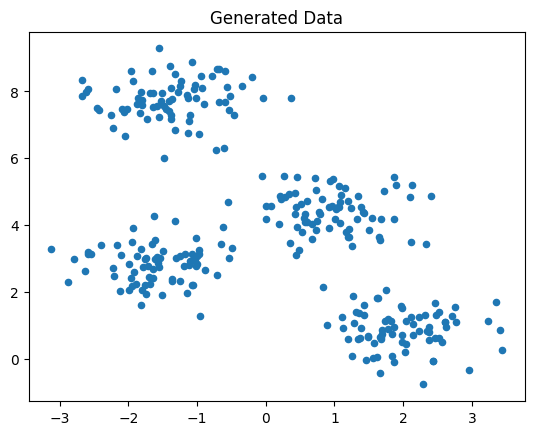

In [4]:
# 가상 데이터 생성
X, y_true = make_blobs(n_samples=300,
                       centers=4, # Cluster의 수 혹은 Cluster의 중심 위치 좌표
                       cluster_std=0.60, # 각 클러스터가 얼마나 퍼져있게 할건지
                       n_features=2, # 사용할 feature의 수, 시각화를 위해 2차원 사용
                       random_state=0)
# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Generated Data")
plt.show()

# K-means 클러스터링 진행

In [5]:
from sklearn.cluster import KMeans

# K-Means 클러스터링 수행 (k=4)
kmeans = KMeans(n_clusters=4,
                init='k-means++', # 초기 클러스터 중심 위치를 잡는 초기화 방법
                n_init=10, # 초기 중심점 잡기를 얼마나 많은 다른 방법으로 설정할지를 결정 / 10번의 시도를 하겠다는 것이고, 10번 중 최고의 SSE 성능을 보이는 모델을 최종 모델로 사용
                random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

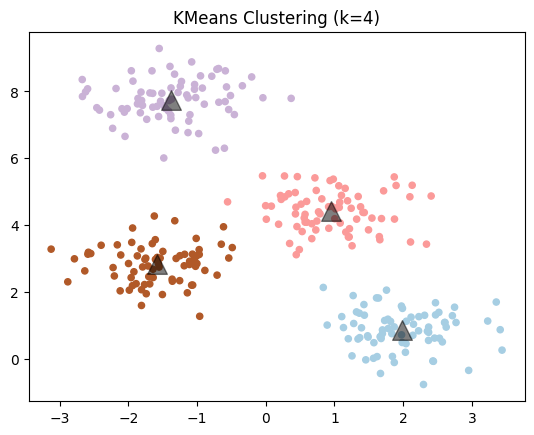

In [6]:
# 클러스터링 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap=plt.cm.Paired)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='^')
plt.title("KMeans Clustering (k=4)")
plt.show()

# 엘보우 방법 (Elbow Method)

In [7]:
# 1~10 까지의 K를 설정하고 각 경우에 맞춰 학습을 진행
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # SSE 값을 저장

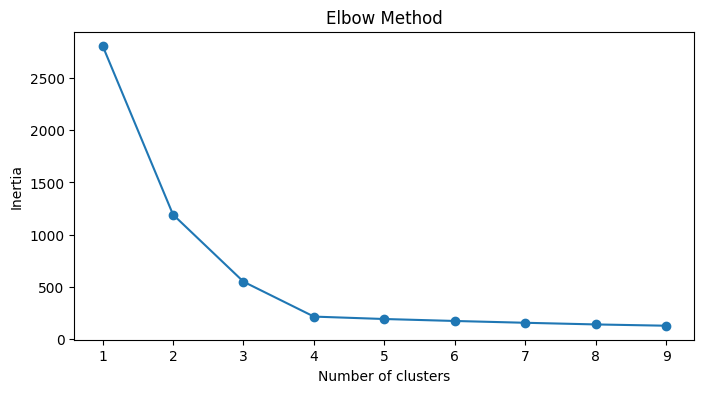

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 실루엣 계수 (Silhouette Coefficient)

1에 가까울수록 좋음

In [13]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score: {:.2f}".format(silhouette_avg))

Silhouette Score: 0.68


- SSE 결과로 나왔던 Elbow point 와 실루엣 계수로 나온는 Elbow point 가같은지 코드로 확인
- 주의 : 실루엣계수는 k=1인 상황에서 계산 x

In [16]:
# 2~10 까지의 K를 설정하고 각 경우에 맞춰 학습을 진행
silhouette = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)

    y_kmeans_sil = kmeans.predict(X)
    silhouette.append(silhouette_score(X, y_kmeans_sil))

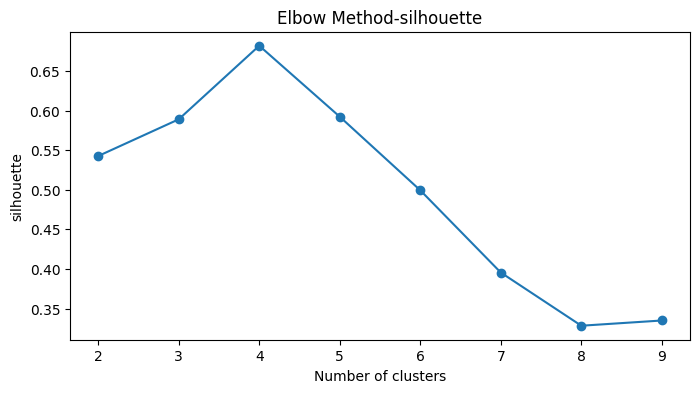

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.title('Elbow Method-silhouette')
plt.show()

실루엣 계수 방법에서도 k=4인 부분에서 제일 두드러짐 !